# Семинар по Pytorch

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn

Установка: https://pytorch.org/get-started/locally/  
В этом блокноте будут разобраны основные особенности фреймворка Pytorch. Pytorch похож на Numpy, только умеет эффективно автоматически считать радиенты.

In [2]:
import os

import torch
from torch import nn
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import tqdm

In [3]:
print(torch.__version__)

1.7.1


In [4]:
# проверка доступности CUDA
torch.cuda.is_available()

True

# Базовые операции

In [5]:
# numpy
x = np.arange(25).reshape(5, 5)

print(f"X:\n{x}\n")
print(f"X.shape: {x.shape}\n")
print(f"Возведение в квадрат:\n{x * x}\n")
print(f"X * X.T:\n{np.matmul(x, x.T)}\n")
print(f"Cреднее по столбцам:\n{np.mean(x, axis=0)}\n")
print(f"Сумма по строкам:\n{np.cumsum(x, axis=1)}")

X:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

X.shape: (5, 5)

Возведение в квадрат:
[[  0   1   4   9  16]
 [ 25  36  49  64  81]
 [100 121 144 169 196]
 [225 256 289 324 361]
 [400 441 484 529 576]]

X * X.T:
[[  30   80  130  180  230]
 [  80  255  430  605  780]
 [ 130  430  730 1030 1330]
 [ 180  605 1030 1455 1880]
 [ 230  780 1330 1880 2430]]

Cреднее по столбцам:
[10. 11. 12. 13. 14.]

Сумма по строкам:
[[  0   1   3   6  10]
 [  5  11  18  26  35]
 [ 10  21  33  46  60]
 [ 15  31  48  66  85]
 [ 20  41  63  86 110]]


In [6]:
# torch
x = torch.arange(25).reshape(5, 5).float()

print(f"X:\n{x}\n")
print(f"X.shape: {x.shape}\n")
print(f"Возведение в квадрат:\n{x * x}\n")
print(f"X * X.T:\n{torch.matmul(x, x.T)}\n")
print(f"Cреднее по столбцам:\n{torch.mean(x, axis=0)}\n")
print(f"Сумма по строкам:\n{torch.cumsum(x, axis=1)}")

X:
tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.]])

X.shape: torch.Size([5, 5])

Возведение в квадрат:
tensor([[  0.,   1.,   4.,   9.,  16.],
        [ 25.,  36.,  49.,  64.,  81.],
        [100., 121., 144., 169., 196.],
        [225., 256., 289., 324., 361.],
        [400., 441., 484., 529., 576.]])

X * X.T:
tensor([[  30.,   80.,  130.,  180.,  230.],
        [  80.,  255.,  430.,  605.,  780.],
        [ 130.,  430.,  730., 1030., 1330.],
        [ 180.,  605., 1030., 1455., 1880.],
        [ 230.,  780., 1330., 1880., 2430.]])

Cреднее по столбцам:
tensor([10., 11., 12., 13., 14.])

Сумма по строкам:
tensor([[  0.,   1.,   3.,   6.,  10.],
        [  5.,  11.,  18.,  26.,  35.],
        [ 10.,  21.,  33.,  46.,  60.],
        [ 15.,  31.,  48.,  66.,  85.],
        [ 20.,  41.,  63.,  86., 110.]])


# Pytorch — почти Numpy
Он позволяет создавать тензоры и вычислять их градиенты без создания сессий, как это происходит в TensorFlow.
Названия методов очень похожи. Если они отличаются — может помочь следующая таблица: https://github.com/torch/torch7/wiki/Torch-for-Numpy-users


# Pytroch считает backpropagation за нас с помощью модуля autograd

In [7]:
# создаём тензор
preds = torch.zeros(5, requires_grad=True)

# вектор предсказаний
labels = torch.ones(5, requires_grad=True)

# loss: MAE
loss = torch.mean(torch.abs(labels - preds))
print(loss)

# запускаем backprop
loss.backward()

tensor(1., grad_fn=<MeanBackward0>)


In [8]:
# градиенты доступны в поле .grad:
preds.grad

tensor([-0.2000, -0.2000, -0.2000, -0.2000, -0.2000])

In [9]:
# градиенты можно занулить
preds.grad.zero_()

tensor([0., 0., 0., 0., 0.])

In [10]:
# теперь градиенты снова 0
preds.grad

tensor([0., 0., 0., 0., 0.])

###  Градиенты накапливаются при каждом вызове backward()

In [11]:
# создаем тензор
preds = torch.zeros(5, requires_grad=True)

# вектор предсказаний
labels = torch.ones(5, requires_grad=True)

# loss: MAE
loss = torch.mean(torch.abs(labels - preds))
print(loss)

# запускаем backprop
for i in range(5):
    loss.backward(retain_graph=True)
    print(i, preds.grad)

tensor(1., grad_fn=<MeanBackward0>)
0 tensor([-0.2000, -0.2000, -0.2000, -0.2000, -0.2000])
1 tensor([-0.4000, -0.4000, -0.4000, -0.4000, -0.4000])
2 tensor([-0.6000, -0.6000, -0.6000, -0.6000, -0.6000])
3 tensor([-0.8000, -0.8000, -0.8000, -0.8000, -0.8000])
4 tensor([-1., -1., -1., -1., -1.])


# Пишем свою логистическую регрессию на PyTorch

In [12]:
from sklearn.datasets import make_blobs
import sklearn

X, y = make_blobs(n_samples=200, centers=((10, 5), (5, -5)), n_features=2,
                  random_state=0, cluster_std=3)

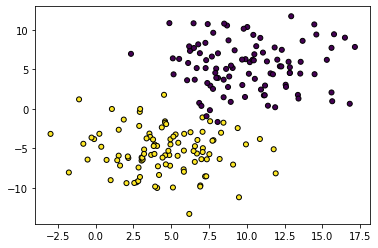

In [13]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

# Напоминание о том, как это было в Sklearn

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

In [16]:
model.fit(X, y)

LogisticRegression()

In [17]:
model.coef_

array([[-0.88455561, -1.38564754]])

In [18]:
model.intercept_

array([5.7855947])

## Визуализируем разделяющую плоскость

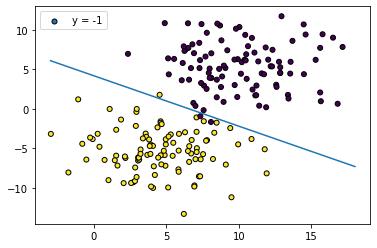

In [19]:
w_1 = model.coef_[0][0]
w_2 = model.coef_[0][1]
w_0 = model.intercept_[0]

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.legend(['y = -1', 'y = 1'])

x_arr = np.linspace(-3, 18, 1000)
y_arr = -(w_0 + w_1 * x_arr) / w_2

plt.plot(x_arr, y_arr)
plt.show()

# Логистическая регрессия на PyTorch

In [20]:
from sklearn.datasets import make_blobs
import sklearn

X, y = make_blobs(n_samples=200, centers=((10, 5), (5, -5)), n_features=2,
                  random_state=0, cluster_std=3)

In [21]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [22]:
# cоздаём тензоры из X и y
X = torch.Tensor(X)
y = torch.Tensor(y)

In [23]:
assert type(X) == torch.Tensor
assert type(y) == torch.Tensor

In [24]:
# создаём веса w и смещение b для линейной модели
# размерность w: (X.shape[1],)
# размерность b: (X.shape[0],)
# выставляем нужные значения в поля required_grad и dtype

w = torch.rand(size=(X.shape[1],), requires_grad=True, dtype=X.dtype)
b = torch.ones(size=(X.shape[0],), requires_grad=True, dtype=X.dtype)

In [25]:
assert w.requires_grad
assert len(w.shape) == 1
assert w.shape[0] == X.shape[1]
assert w.dtype == X.dtype
assert b.requires_grad
assert len(b.shape) == 1
assert b.dtype == X.dtype

In [26]:
def binary_cross_entropy(y, y_predicted):
    """
    y: binary tensor, shape: N, example: [0, 1, 0, 1, 1]
    y_pred: tensor with values from 0 to 1. shape: N. example: [0.2, 0, 1, 0.75, 0.999]
    
    output: tensor, shape: N
    
    """
    y_predicted = torch.maximum(y_predicted, torch.Tensor([1e-5]))
    y_predicted = torch.minimum(y_predicted, torch.Tensor([1 - 1e-5]))
    bce = -y * torch.log(y_predicted) - (1 - y) * torch.log(1 - y_predicted)
    return bce

In [27]:
y_test = torch.tensor([1, 0, 1, 1])
y_pred = torch.tensor([0.7, 0.3, 0.5, 0.9])
bce_correct = torch.tensor([0.3567, 0.3567, 0.6931, 0.1054])
bce_predicted = binary_cross_entropy(y_test, y_pred)
assert bce_predicted.shape == y_test.shape
assert torch.allclose(bce_predicted, bce_correct, rtol=1e-03)

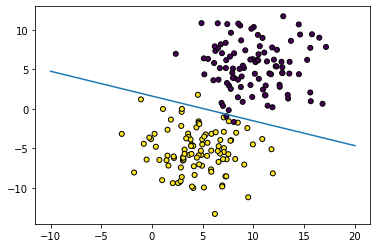

Iteration: 1000, Loss: 16.375362396240234


In [28]:
from IPython.display import clear_output

lr = 0.00001

for i in range(1000):
    y_pred = torch.sigmoid(torch.matmul(X, w) + b)
    loss = torch.sum(binary_cross_entropy(y, y_pred))

    # вычисляем градиенты
    loss.backward()

    # обновляем веса
    w.data -= lr * w.grad
    b.data -= lr * b.grad

    # обнуляем градиенты
    w.grad.zero_()
    b.grad.zero_()

    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

        w_1 = w.data[0]
        w_2 = w.data[1]
        w_0 = b.data[0]

        x_arr = torch.linspace(-10, 20, 1000)
        plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
        plt.show()

        print("Iteration: {}, Loss: {}".format(i + 1, loss))

# Теперь всё за нас делает PyTorch

In [29]:
from sklearn.datasets import make_blobs
import sklearn
X, y = make_blobs(n_samples=200, centers=2, n_features=2,
                  random_state=0, cluster_std=0.6)

In [30]:
X, y = make_blobs(n_samples=200, centers=((10, 5), (5, -5)), n_features=2,
                  random_state=0, cluster_std=3)

In [31]:
X = torch.tensor(X)
y = torch.tensor(y)

# Инициализируем модель

In [32]:
model = torch.nn.Linear(2, 1)

criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=0.1)

model.train()

Linear(in_features=2, out_features=1, bias=True)

In [33]:
model

Linear(in_features=2, out_features=1, bias=True)

In [34]:
model.weight

Parameter containing:
tensor([[-0.4425,  0.4144]], requires_grad=True)

In [35]:
model.bias

Parameter containing:
tensor([-0.6083], requires_grad=True)

In [36]:
model.weight.data.dtype

torch.float32

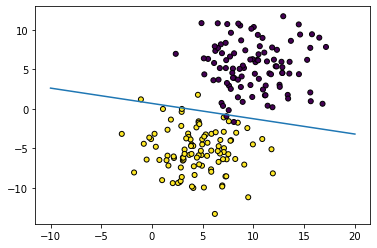

Iteration: 1000, Loss: 0.05226801708340645


In [37]:
from IPython.display import clear_output

for i in range(1000):
    # вычисляем предсказание
    y_pred = torch.sigmoid(model(X.float()))

    # вычисляем ошибку
    loss = criterion(y_pred.flatten(), y.float())

    # вычисляем градиенты
    loss.backward()

    # делаем шаг оптимизатором
    optim.step()     

    # обнуляем градиенты
    optim.zero_grad() 

    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

        w_1 = model.weight.data[0][0]
        w_2 = model.weight.data[0][1]

        w_0 = model.bias.data[0]

        x_arr = torch.linspace(-10, 20, 1000)
        plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
        plt.show()

        print ("Iteration: {}, Loss: {}".format(i + 1, loss))

# Пусть теперь проблема нелинейная

In [38]:
from sklearn.datasets import make_moons

In [39]:
X, y = make_moons(n_samples=200, noise=.1, random_state=17)

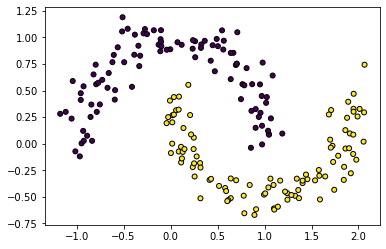

In [40]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

X = torch.tensor(X)
y = torch.tensor(y)

In [41]:
model = torch.nn.Linear(2, 1)

criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

model.train()

Linear(in_features=2, out_features=1, bias=True)

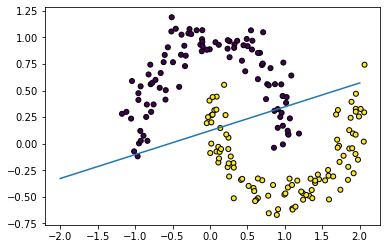

Iteration: 30000, Loss: 0.2655724287033081


In [42]:
from IPython.display import clear_output

for i in range(30000):
    y_pred = torch.sigmoid(model(X.float()))

    loss = criterion(y_pred.flatten(), y.float())

    loss.backward()
    optim.step()
    optim.zero_grad()

    if (i + 1) % 500 == 0:
        clear_output(True)
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

        w_1 = model.weight.data[0][0]
        w_2 = model.weight.data[0][1] 
        w_0 = model.bias.data[0]

        x_arr = torch.linspace(-2, 2, 1000)
        plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
        plt.show()
        
        print ("Iteration: {}, Loss: {}".format(i + 1, loss))

# Визуализируем разделяющую плоскость

In [43]:
h = .02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
model.eval()
Z = torch.sigmoid(model(input_tensor))
Z = Z.reshape(xx.shape)

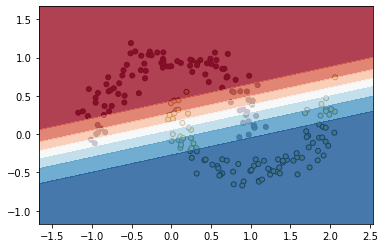

In [44]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=.8)

plt.show()

# Усложним модель, добавив второй слой

In [45]:
model = nn.Sequential()
model.add_module('first', nn.Linear(2, 2))
model.add_module('first_activation', nn.Sigmoid())
model.add_module('second', nn.Linear(2, 1))
model.add_module('second_activation', nn.Sigmoid())

In [46]:
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=2.)

model.train()

Sequential(
  (first): Linear(in_features=2, out_features=2, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=2, out_features=1, bias=True)
  (second_activation): Sigmoid()
)

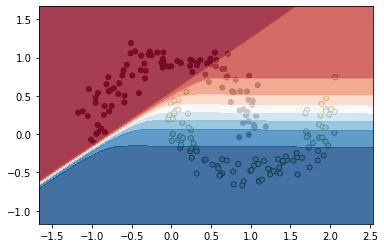

Iteration: 30000, Loss: 0.22296090424060822


In [47]:
from IPython.display import clear_output

h = .02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

model.train()

for i in range(30000):
    y_pred = model(X.float())
        
    loss = criterion(y_pred.flatten(), y.float())
    
    loss.backward()
    optim.step()
    optim.zero_grad()

    if (i + 1) % 500 == 0:
        clear_output(True)
        input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        Z = torch.sigmoid(model(input_tensor))
        Z = Z.reshape(xx.shape)

        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

        plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=.8)

        plt.show()
        
        print ("Iteration: {}, Loss: {}".format(i + 1, loss))

# Усложним модель, добавив третий слой

In [48]:
model = nn.Sequential()
model.add_module('first', nn.Linear(2, 2))
model.add_module('first_activation', nn.Sigmoid())
model.add_module('second', nn.Linear(2, 2))
model.add_module('second_activation', nn.Sigmoid())
model.add_module('third', nn.Linear(2, 1))
model.add_module('third_activation', nn.Sigmoid())

In [49]:
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=2., momentum=0.9)

model.train()

Sequential(
  (first): Linear(in_features=2, out_features=2, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=2, out_features=2, bias=True)
  (second_activation): Sigmoid()
  (third): Linear(in_features=2, out_features=1, bias=True)
  (third_activation): Sigmoid()
)

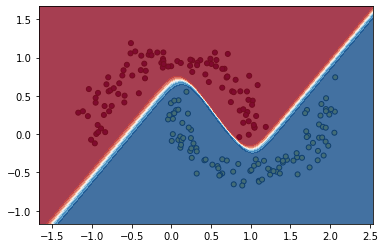

Iteration: 30000, Loss: 1.5986313883331604e-05


In [50]:
from IPython.display import clear_output

h = .02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

model.train()

for i in range(30000):
    y_pred = model(X.float())

    loss = criterion(y_pred.flatten(), y.float())

    loss.backward()
    optim.step()           
    optim.zero_grad() 

    if (i + 1) % 500 == 0:
        clear_output(True)
        input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        Z = torch.sigmoid(model(input_tensor))
        Z = Z.reshape(xx.shape)

        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

        plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=.8)

        plt.show()

        print ("Iteration: {}, Loss: {}".format(i + 1, loss))

# Усложним модель, увеличив размерность скрытых слоёв

In [51]:
model = nn.Sequential()
model.add_module('first', nn.Linear(2, 5))
model.add_module('first_activation', nn.Sigmoid())
model.add_module('second', nn.Linear(5, 5))
model.add_module('second_activation', nn.Sigmoid())
model.add_module('third', nn.Linear(5, 1))
model.add_module('third_activation', nn.Sigmoid())

In [52]:
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=2., momentum=0.9)

model.train()

Sequential(
  (first): Linear(in_features=2, out_features=5, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=5, out_features=5, bias=True)
  (second_activation): Sigmoid()
  (third): Linear(in_features=5, out_features=1, bias=True)
  (third_activation): Sigmoid()
)

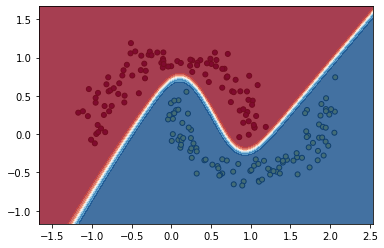

Iteration: 3000, Loss: 3.558447497198358e-05


In [53]:
from IPython.display import clear_output

h = .02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

model.train()

for i in range(3000):
    y_pred = model(X.float())

    loss = criterion(y_pred.flatten(), y.float())

    loss.backward()
    optim.step()           
    optim.zero_grad() 

    if (i + 1) % 50 == 0:
        clear_output(True)
        input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        Z = torch.sigmoid(model(input_tensor))
        Z = Z.reshape(xx.shape)

        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

        plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=.8)

        plt.show()

        print ("Iteration: {}, Loss: {}".format(i + 1, loss))

# Увеличим количество классов

In [54]:
from sklearn.datasets import make_circles

In [55]:
# blobs with varied variances
X, y = make_blobs(n_samples=400, cluster_std=[1.0, 1.5, 0.5], random_state=17)

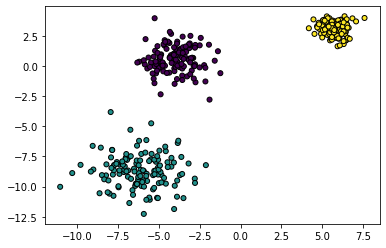

In [56]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

X = torch.tensor(X)
y = torch.tensor(y)

In [57]:
model = nn.Sequential()
model.add_module('first', nn.Linear(2, 5))
model.add_module('first_activation', nn.Sigmoid())
model.add_module('second', nn.Linear(5, 5))
model.add_module('second_activation', nn.Sigmoid())
model.add_module('third', nn.Linear(5, 3))

In [58]:
criterion = nn.CrossEntropyLoss()

optim = torch.optim.SGD(model.parameters(), lr=0.1)

model.train()

Sequential(
  (first): Linear(in_features=2, out_features=5, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=5, out_features=5, bias=True)
  (second_activation): Sigmoid()
  (third): Linear(in_features=5, out_features=3, bias=True)
)

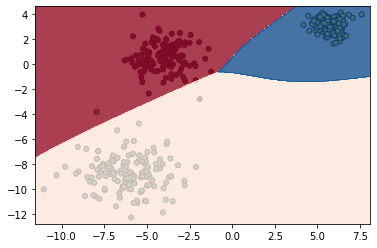

Iteration: 1000, Loss: 0.06381943076848984


In [59]:
from IPython.display import clear_output

h = .02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

model.train()

for i in range(1000):
    y_pred = model(X.float())

    loss = criterion(y_pred, y)

    loss.backward()
    optim.step()
    optim.zero_grad()

    if (i + 1) % 25 == 0:
        clear_output(True)
        input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        Z = model(input_tensor)
        Z = torch.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)

        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

        plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=.8)

        plt.show()

        print ("Iteration: {}, Loss: {}".format(i + 1, loss))